In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')
%matplotlib inline

In [2]:
from sklearn import linear_model, datasets

In [3]:
diabetes = datasets.load_diabetes()  # load dataset

### scikit learn method

In [4]:
diabetes_X = diabetes.data[:, np.newaxis, 2]  # reshape to column vector

# train data
train_X = diabetes_X[:-20]
test_X = diabetes_X[-20:]

# test data
train_y = diabetes.target[:-20]
test_y = diabetes.target[-20:]

'''
alpha - the regularization parameter for Ridge
    Bias-Variance Tradeoff
    Good: Larger values specify stronger regularization => reduces the variance of the estimates 
    Bad:  Larger values specify stronger regularization => increases the bias of the estimates (shrinks R-squared)
'''
# NOTE (to self):
# hyper parameter (a parameter whose value is set before the learning process begins)
alphas = np.linspace(1e-4, 5, 20)

model = linear_model.Ridge()
model_r_squares = []
for alpha in alphas:
    model_r_squares.append(model
                           .set_params(alpha=alpha)
                           .fit(train_X, train_y)
                           .score(test_X, test_y)  # calculates R-square
                          )

The purpose behind regularization and

In [6]:
scratch_model_r_squares = []
for alpha in alphas:
    
    # find parameters (betas)
    reg_matrix = alpha * np.ones(train_X.shape) # regularization matrix
    fit_params = np.linalg.pinv(train_X.T @ train_X + reg_matrix.T @ reg_matrix) @ train_X.T @ train_y
    
    # fit parameters & make model
    y_int = fit_params * train_X.T.mean() + train_y.mean()
    y_hat = fit_params * test_X.ravel() + y_int
    
    # measure R-square
    coef = 1 - np.var(test_y - y_hat) / np.var(test_y)
    
    # save coef
    scratch_model_r_squares.append(coef)

In [7]:
print("R-square as alpha increases:\n")
print("\tScikit-learn\tScratch Model")
print('Alphas\tR-squares\tR-squares')
for a, sci, scratch in zip(alphas, model_r_squares, scratch_model_r_squares):
    print(f'{a:.4f}\t{sci:.4f}\t\t{scratch:.4f}')

R-square as alpha increases:

	Scikit-learn	Scratch Model
Alphas	R-squares	R-squares
0.0001	0.4726		0.5396
0.2633	0.4060		0.0297
0.5264	0.3432		0.0077
0.7896	0.2899		0.0034
1.0527	0.2457		0.0019
1.3159	0.2090		0.0012
1.5790	0.1781		0.0009
1.8422	0.1519		0.0006
2.1053	0.1294		0.0005
2.3685	0.1099		0.0004
2.6316	0.0929		0.0003
2.8948	0.0780		0.0003
3.1579	0.0647		0.0002
3.4211	0.0529		0.0002
3.6842	0.0423		0.0002
3.9474	0.0327		0.0001
4.2105	0.0240		0.0001
4.4737	0.0160		0.0001
4.7368	0.0088		0.0001
5.0000	0.0021		0.0001


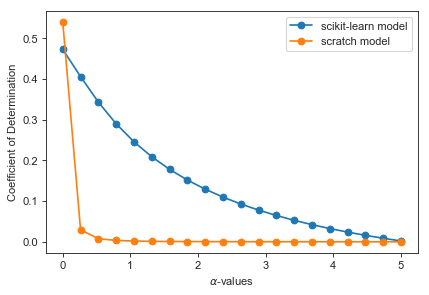

In [10]:
plt.figure(dpi=80)
plt.plot(alphas, model_r_squares, 'o-', label='scikit-learn model')
plt.plot(alphas, scratch_model_r_squares, 'o-', label='scratch model')
plt.xlabel(r'$\alpha$-values')
plt.ylabel('Coefficient of Determination')
plt.legend()
plt.show()